In [1]:
import csv
import cv2
import numpy as np
import os

def process_files():
    lines = []
    with open('./data/driving_log.csv') as csvfile:
        reader = csv.reader(csvfile)
        next(reader, None)
        for line in reader:
            lines.append(line)

    images = []
    measurements = []
    for line in lines:
        for line in lines:
            source_path = line[0]
            filename = source_path.split('/')[-1]
            current_path = './data/IMG/' + filename
            image = cv2.imread(current_path)
            images.append(image)
            measurement = float(line[3])
            measurements.append(measurement)

    X_train = np.array(images)
    y_train = np.array(measurements)

# process_files()

In [2]:
# np.save('trial_X', X_train)
# np.save('trial_y', y_train)

In [3]:
X_train = np.load('trial_X.npy')
y_train = np.load('trial_y.npy')

In [4]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Dropout, Lambda, ELU
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

Using TensorFlow backend.


In [5]:
def model_1():
    model = Sequential()
    model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape = (160, 320, 3)))
    model.add(Flatten())
    model.add(Dense(1))

    model.compile(loss = 'mse', optimizer = 'adam')
    model.fit(X_train, y_train, validation_split = 0.2, shuffle = True, nb_epoch = 7)

    model.save('model_1.h5')

In [6]:
# model_1()

In [7]:
def model_nvidia():
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5 - 1., input_shape = (160,320,3)))
    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), border_mode = "valid", init = 'he_normal'))
    model.add(ELU())
    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), border_mode = "valid", init = 'he_normal'))
    model.add(ELU())
    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), border_mode = "valid", init = 'he_normal'))
    model.add(ELU())
    model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode = "valid", init = 'he_normal'))
    model.add(ELU())
    model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode = "valid", init = 'he_normal'))
    model.add(ELU())
    model.add(Flatten())
    model.add(Dense(1164, init='he_normal'))
    model.add(ELU())
    model.add(Dense(100, init='he_normal'))
    model.add(ELU())
    model.add(Dense(50, init='he_normal'))
    model.add(ELU())
    model.add(Dense(10, init='he_normal'))
    model.add(ELU())
    model.add(Dense(1, init='he_normal'))
    
    model.compile(loss = 'mse', optimizer = 'adam')
    model.fit(X_train, y_train, validation_split = 0.2, shuffle = True, nb_epoch = 7)

    model.save('model_nvidia.h5')

In [8]:
# model_nvidia()

In [9]:
import pandas as pd

data = pd.read_csv('./data/driving_log.csv')


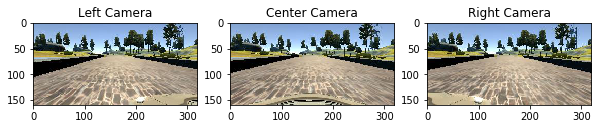

In [10]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

def convert_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def read_image(path):
    return cv2.imread('data/' + path)

img_left = read_image(data['left'][0].strip())
img_center = read_image(data['center'][0].strip())
img_right = read_image(data['right'][0].strip())

import os

# print (data['left'][0].strip())
# print(data['center'][0])
# print(data['right'][0])

plt.figure(figsize=(10,4))

plt.subplot(131)
plt.imshow(convert_rgb(img_left))
plt.title('Left Camera')

plt.subplot(132)
plt.imshow(convert_rgb(img_center))
plt.title('Center Camera')

plt.subplot(133)
plt.imshow(convert_rgb(img_right))
plt.title('Right Camera')

plt.show()





In [11]:
data.head()
# print(len(data))

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


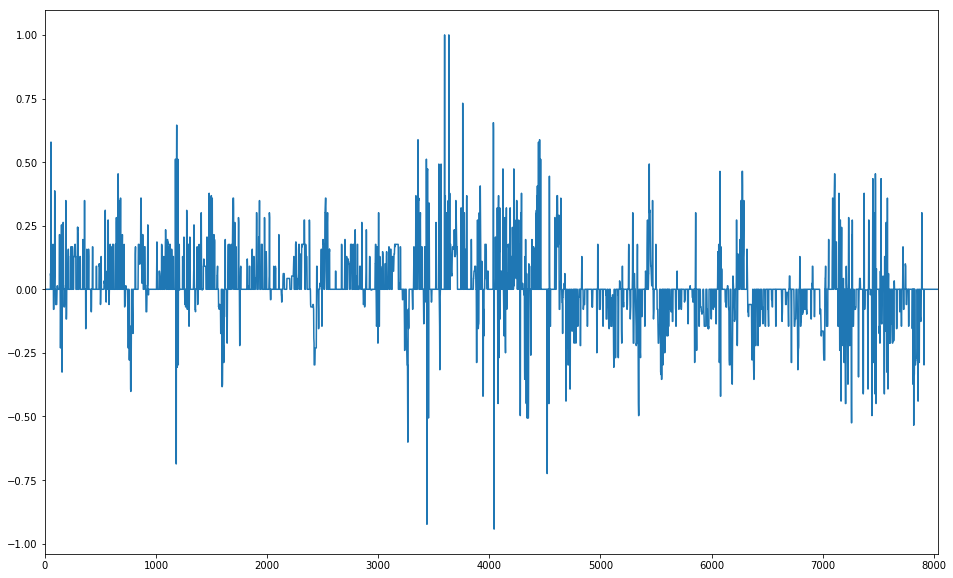

In [12]:
plt.figure(figsize=(16,10))
data['steering'].plot()
plt.show()

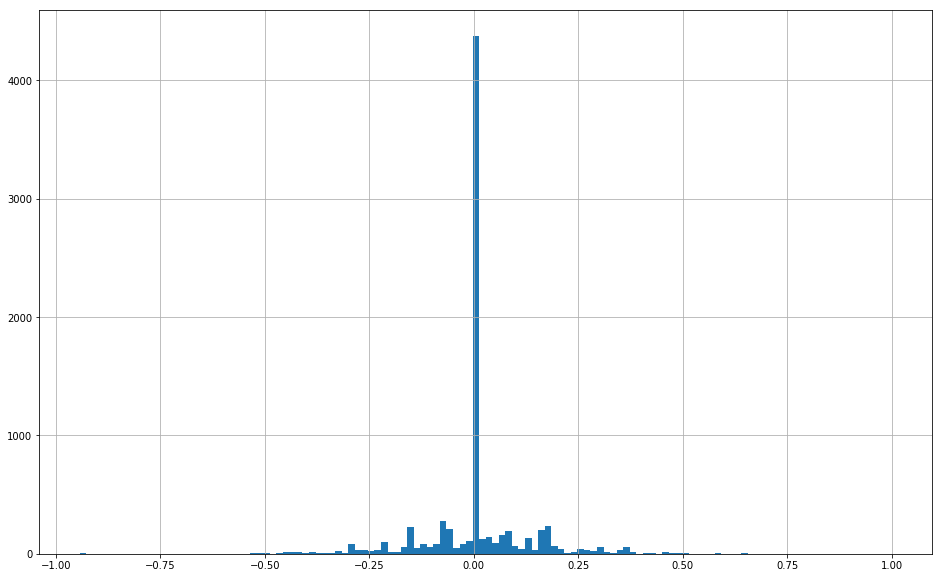

In [13]:
plt.figure(figsize=(16,10))
data['steering'].hist(bins = len(np.unique(data['steering'])))
plt.show()

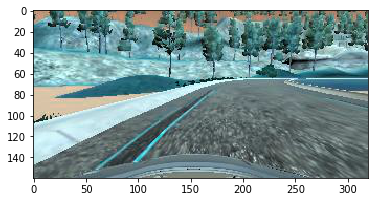

1.0
-1.0


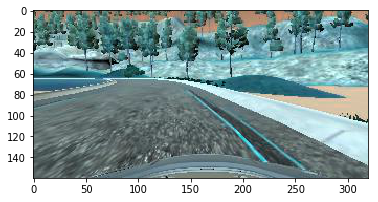

In [14]:
def flip_img(img):
    return np.fliplr(img)

def flip_angle(angle):
    return -angle

img = X_train[3598]
raw_img = img
img_flipped = flip_img(img)
ang = data['steering'][3598]
ang_flipped = flip_angle(ang)
plt.imshow(img)
plt.show()
print(ang)
plt.imshow(img_flipped)
plt.show
print(ang_flipped)

In [15]:
print (next((x, i) for x, i in enumerate(data['steering']) if i >= 1))

(3598, 1.0)


In [16]:
print ([(x, i) for x, i in enumerate(data['steering']) if i >= 0.8][0])

(3598, 1.0)


In [101]:
def crop_img(img):
    return img[50:140, : ]

def resize_img(img):
    return cv2.resize(img, (200, 66))

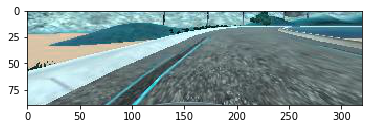

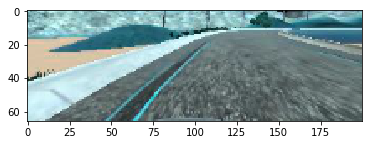

In [102]:
plt.imshow(crop_img(img))
plt.show()
plt.imshow(resize_img(crop_img(img)))
plt.show()

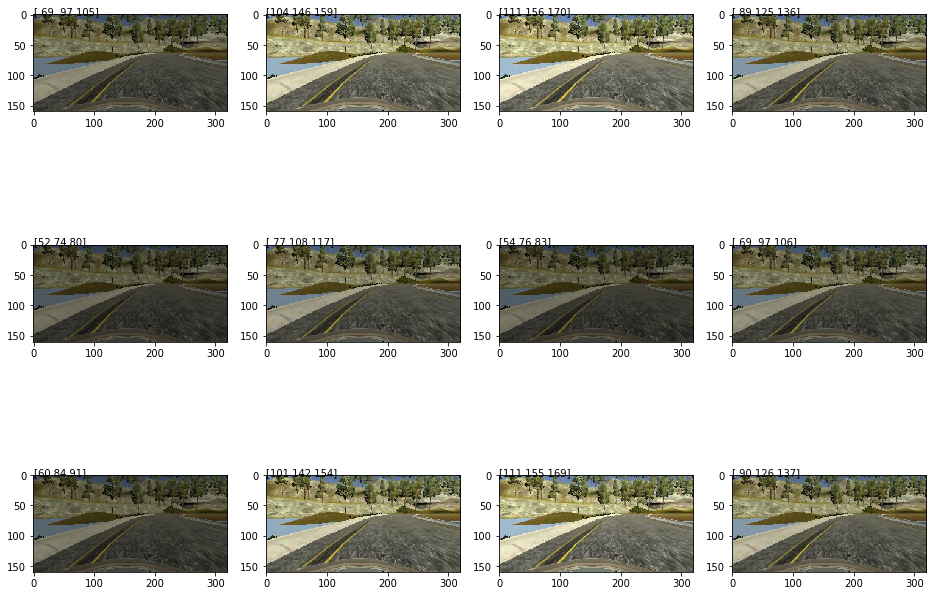

In [143]:

def random_contrast(img):
    img_temp = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img_temp[:,:,2] = img_temp[:,:,2] * np.random.uniform(.4, 1.)
    img_temp = cv2.cvtColor(img_temp, cv2.COLOR_HSV2BGR)
    return img_temp

plt.figure(figsize=(16,12))
for i in range(12):
    plt.subplot(3, 4, i+1)
    temp = convert_rgb(random_contrast(raw_img))
    plt.imshow(temp)
    plt.text(0,0, temp[0][0])

plt.show()

IMG/left_2016_12_01_13_38_42_894.jpg
1.25


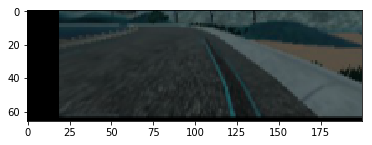

(160, 320, 3)


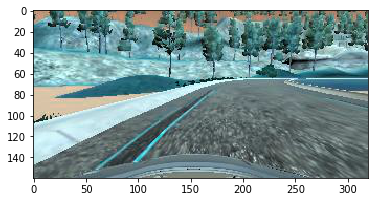

-0.99580527958
(66, 200, 3)


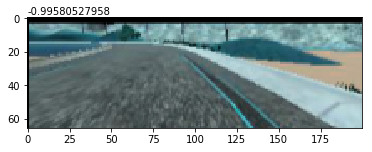

In [246]:


import random

def jitter_transition(img, angle):
    transRange = 50
    numPix = 10
    valPix = 0.1
    transX = transRange * np.random.uniform() - transRange / 2
    angle = angle + transX / transRange * 2 * valPix
    transY = numPix * np.random.uniform() - numPix / 2
    transMat = np.float32([[1, 0, transX], [0, 1, transY]])
    img = cv2.warpAffine(img, transMat, (200, 66))
    
    return img, angle



def transition_image(img, angle):
    trans_val_x = .50
    trans_val_y = .015
    trans_x = trans_val_x * np.random.uniform() - trans_val_x / 2
    angle = angle + trans_x / trans_val_x * 2 * 0.2
    trans_y = trans_val_y * np.random.uniform() - trans_val_y / 2
    trans_mat = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
    img = cv2.warpAffine(img, trans_mat,(200,66))
    
    return img, angle
def select_camera(path):
    camera_selection = [0, 1, 2]
#     camera_selection = [1]
    camera_choice = random.choice(camera_selection)
    if camera_choice == 0:
        camera_file = path['left']
        ang = path['steering'][0] + 0.25
    elif camera_choice == 1:
        camera_file = path['center']
        ang = path['steering'][0]
    elif camera_choice == 2:
        camera_file = path['right']
        ang = path['steering'][0] - 0.25
        
    return camera_file, ang
    
def preprocess_train(img, ang):
    img = crop_img(img)
    img = resize_img(img)
    img = random_contrast(img)
#     img, ang = transition_image(img, ang)
    img, ang = jitter_transition(img, ang)
    flip_choice = random.choice([0, 1])
    if flip_choice == 1:
        img = flip_img(img)
        ang = flip_angle(ang)
    else:
        img = img
        ang = ang
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img, ang

# def preprocess_valid(img, ang):
#     img = crop_img(img)
#     img = resize_img(img)
#     img = random_contrast(img)
#     flip_choice = random.choice([0, 1])
#     if flip_choice == 1:
#         img = flip_img(img)
#         ang = flip_angle(ang)
#     return img, ang
processed_camera = select_camera(data.iloc[[3598]].reset_index())
print (processed_camera[0][0].strip())
comeon = cv2.imread('data/' + processed_camera[0][0].strip())
# print (comeon)
comeon = np.array(comeon)
# print (comeon)
print (processed_camera[1])
plt.imshow(preprocess_train(comeon, processed_camera[1])[0])
plt.show()
processed_img = preprocess_train(raw_img, ang)


print(raw_img.shape)
plt.imshow(raw_img)
plt.show()
plt.imshow(processed_img[0])
print(processed_img[1])
plt.text(0,-2,processed_img[1])
print (processed_img[0].shape)

In [247]:
from scipy.misc import imread

def train_pipe(path, batch_size = 250):
    csv_data = pd.read_csv(path + '/driving_log.csv')
    
#     batch_images = np.empty((batch_size, 66, 200, 3))
#     batch_angles = np.empty(batch_size)
    while True:
        batch_images = []
        batch_angles = []
        batch_full = False
        batch_count = 0
        actual_count = 0
#         for i in range(batch_size):
        while batch_full == False:
            
            line_loc = np.random.randint(0, len(csv_data))# - i)
            line_data = csv_data.iloc[[line_loc]].reset_index()
#             if batch_count < 3:
#                 print (batch_count)
#                 print (line_data)
#                 print (line_data['center'])
            image_file, angle = select_camera(line_data)
            image_file = image_file[0]
#             angle = angle[0]
#             print (image_file)
#             if len(image_file) > 50:
#                 image_file = image_file.lstrip(r"C:\Users\cyran\Documents\projects\data_alternative\\")
#                 image_file = image_file.lstrip(r"C:\Users\cyran\Documents\projects\data_training\\")
#                 image_file = image_file[2:]
#             print (image_file)
            final_path = path + '/' + image_file.strip()
#             image = plt.imread(final_path)
            image = cv2.imread(final_path)
#             image = resize_img(image)
#             image = imread(final_path)

            image, angle = preprocess_train(image, angle)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#             if abs(angle) < 0.15:
#                 if np.random.uniform() > 0.1:
#                     batch_images[batch_count] = image
#                     batch_angles[batch_count] = angle
#                     batch_count += 1
#             else:
#                 batch_images[batch_count] = image
#                 batch_angles[batch_count] = angle
#                 batch_count += 1
            
#             batch_images[batch_count] = image
#             batch_angles[batch_count] = angle
            batch_images.append(image)
            batch_angles.append(angle)
            batch_count += 1
            
            if batch_count == batch_size:
                batch_full = True
            actual_count += 1
#             csv_data.drop(csv_data.index[line_loc])
            

        yield np.array(batch_images), np.array(batch_angles)
            
generate_batch = train_pipe('data')    

def valid_pipe(path):
    csv_data = pd.read_csv(path + '/driving_log.csv')
    
    while True:
        for i in range(len(csv_data)):
            line_data = csv_data.iloc[i]#.reset_index()
            image_path = line_data['center'].strip()
            image = cv2.imread(path + '/' + image_path)
            angle = line_data['steering']
            
            image, angle = preprocess_train(image, angle)
#             image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            image = image.reshape(1, 66, 200, 3)
            angle = np.array([[angle]])
            yield image, angle
            
generate_valid = valid_pipe('data')

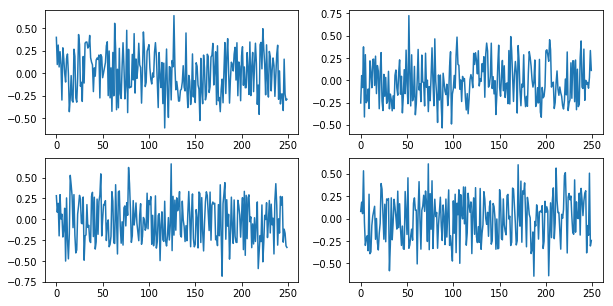

In [248]:
plt.figure(figsize=(10,5))
for i in range(4):
    x, y = next(generate_batch)
    plt.subplot(2, 2, i+1)
    plt.plot(y)
plt.show()



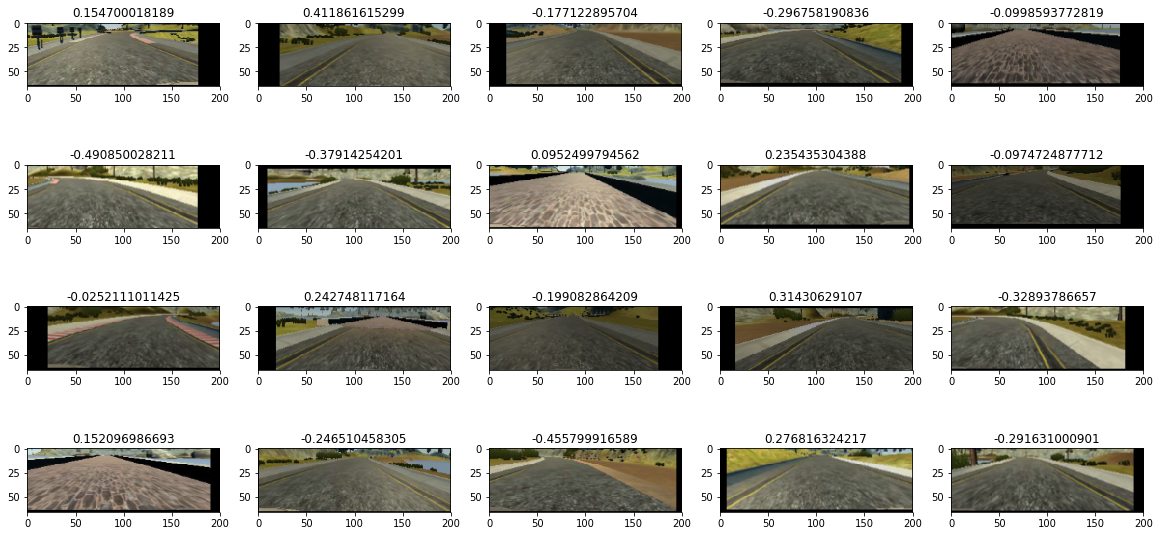

In [249]:
vis, dummy = next(generate_batch)
plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(vis[i])
    plt.title(dummy[i])

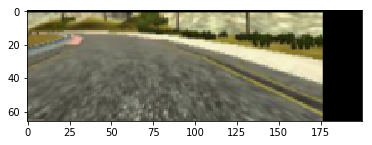

In [250]:
plt.imshow(vis[5])

In [251]:
def fix_pipe(path, batch_size = 5):
    csv_data = pd.read_csv(path + '/driving_log.csv')
    
#     batch_images = np.empty((batch_size, 66, 200, 3))
#     batch_angles = np.empty(batch_size)
#     batch_images = []
#     batch_angles = []
    while True:
        batch_images = []
        batch_angles = []
        batch_full = False
        batch_count = 0
        actual_count = 0
        for i in range(batch_size):
            loc_data = csv_data.iloc[[i]].reset_index()
            img_path, ang = select_camera(loc_data)
            real_path = img_path[0].strip()
#             print(real_path)
            img = read_image(real_path)
            img, ang = preprocess_train(img, ang)
            
#             batch_images[i] = img
#             batch_angles[i] = ang
            batch_images.append(img)
            batch_angles.append(ang)
        yield np.array(batch_images), np.array(batch_angles)
roger = fix_pipe('data')            

In [252]:
# mona, inhan = next(roger)
# print (mona.shape)
# print (inhan.shape)
# plt.imshow(mona[1])

In [78]:
def model_2():
    model = Sequential()
#     model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape = (64, 64, 3)))
    model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape = (66, 200, 3)))
    model.add(Flatten())
    model.add(Dense(1))

    model.compile(loss = 'mse', optimizer = 'adam')
#     model.fit(X_train, y_train, validation_split = 0.2, shuffle = True, nb_epoch = 7)
    model.fit_generator(generate_batch, samples_per_epoch = 20000, nb_epoch = 3, validation_data = generate_valid, nb_val_samples = len(data))
    model.save('model_2.h5')

In [79]:
model_2()

Epoch 1/3
20000/20000 [==============================] - 75s - loss: 4.8608 - val_loss: 0.0594
Epoch 2/3
20000/20000 [==============================] - 69s - loss: 0.0657 - val_loss: 0.0374
Epoch 3/3
20000/20000 [==============================] - 69s - loss: 0.0612 - val_loss: 0.0348


In [253]:
def model_nvidia_2():
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5 - 1.0, input_shape = (66,200,3)))
    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), border_mode = "valid", init = 'he_normal'))
    model.add(ELU())
    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), border_mode = "valid", init = 'he_normal'))
    model.add(ELU())
    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), border_mode = "valid", init = 'he_normal'))
    model.add(ELU())
    model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode = "valid", init = 'he_normal'))
    model.add(ELU())
#     model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode = "valid", init = 'he_normal'))
    model.add(ELU())
#     model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(1164, init='he_normal'))
    model.add(ELU())
#     model.add(Dropout(0.5))
    model.add(Dense(100, init='he_normal'))
    model.add(ELU())
#     model.add(Dropout(0.5))
    model.add(Dense(50, init='he_normal'))
    model.add(ELU())
#     model.add(Dropout(0.5))
    model.add(Dense(10, init='he_normal'))
    model.add(ELU())
#     model.add(Dropout(0.5))
    model.add(Dense(1, init='he_normal'))
    
    model.compile(loss = 'mse', optimizer = 'adam')
#     model.fit(X_train, y_train, validation_split = 0.2, shuffle = True, nb_epoch = 7)
    model.fit_generator(generate_batch, samples_per_epoch = 20000, nb_epoch = 3, validation_data = generate_valid, nb_val_samples = len(data))
    model.save('model_nvidia_2.h5')

In [254]:
model_nvidia_2()

Epoch 1/3
20000/20000 [==============================] - 161s - loss: 1.8682 - val_loss: 0.0425
Epoch 2/3
20000/20000 [==============================] - 160s - loss: 0.0545 - val_loss: 0.0401
Epoch 3/3
20000/20000 [==============================] - 160s - loss: 0.0530 - val_loss: 0.0539


In [ ]:
def model_3():
    # Initiating the model
#     input_shape = (64,64,3)
    nb_filters1 = 16
    nb_filters2 = 8
    nb_filters3 = 4
    nb_filters4 = 2

    # size of pooling area for max pooling
    pool_size = (2, 2)

    # convolution kernel size
    kernel_size = (3, 3)

    
    model = Sequential()
    
#     model.add(Lambda(lambda x: x/127.5 - 1., input_shape = (64,64,3)))

    # Starting with the convolutional layer
    # The first layer will turn 1 channel into 16 channels
    model.add(Convolution2D(nb_filters1, kernel_size[0], kernel_size[1],
                            border_mode='valid', input_shape = (66,200,3)))
    # Applying ReLU
    model.add(Activation('relu'))
    # The second conv layer will convert 16 channels into 8 channels
    model.add(Convolution2D(nb_filters2, kernel_size[0], kernel_size[1]))
    # Applying ReLU
    model.add(Activation('relu'))
    # The second conv layer will convert 8 channels into 4 channels
    model.add(Convolution2D(nb_filters3, kernel_size[0], kernel_size[1]))
    # Applying ReLU
    model.add(Activation('relu'))
    # The second conv layer will convert 4 channels into 2 channels
    model.add(Convolution2D(nb_filters4, kernel_size[0], kernel_size[1]))
    # Applying ReLU
    model.add(Activation('relu'))
    # Apply Max Pooling for each 2 x 2 pixels
    model.add(MaxPooling2D(pool_size=pool_size))
    # Apply dropout of 25%
#     model.add(Dropout(0.25))

    # Flatten the matrix. The input has size of 360
    model.add(Flatten())
    # Input 360 Output 16
    model.add(Dense(16))
    # Applying ReLU
    model.add(Activation('relu'))
    # Input 16 Output 16
    model.add(Dense(16))
    # Applying ReLU
    model.add(Activation('relu'))
    # Input 16 Output 16
    model.add(Dense(16))
    # Applying ReLU
    model.add(Activation('relu'))
    # Apply dropout of 50%
    model.add(Dropout(0.5))
    # Input 16 Output 1
    model.add(Dense(1))
    
    model.compile(loss = 'mse', optimizer = 'adam')
#     model.fit(X_train, y_train, validation_split = 0.2, shuffle = True, nb_epoch = 7)
    model.fit_generator(generate_batch, samples_per_epoch = 20000, nb_epoch = 1, validation_data = generate_valid, nb_val_samples = len(data))
    model.save('model_3.h5')

In [ ]:
# model_3()